<a href="https://colab.research.google.com/github/krishna663-wq/Machine_Learning/blob/main/Bank_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
data = pd.read_csv('/content/bank_transactions_data_2.csv')

In [20]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [21]:
data.shape

(2512, 16)

In [22]:
data.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_features=['TransactionType','Location','Channel','CustomerOccupation','TransactionDuration','LoginAttempts','AccountBalance','PreviousTransactionDate']
label_encoders={}
for col in categorical_features:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

In [24]:
data.drop(['TransactionID','AccountID','DeviceID','IP Address','PreviousTransactionDate','MerchantID','TransactionDate'],axis=1,inplace=True)

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [26]:
# Dimensionality reduction
numerical_features = data.select_dtypes(include=np.number).columns
numerical_data = data[numerical_features]
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(numerical_data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

In [27]:
kmeans=KMeans(n_clusters=3,random_state=42)
data['Cluster']=kmeans.fit_predict(data[['PCA1','PCA2']])

In [28]:

# Calculate distances
distances = kmeans.transform(data[['PCA1', 'PCA2']])

# Add distances to the DataFrame
for i in range(distances.shape[1]):
    data[f'Distance_to_Cluster_{i}'] = distances[:, i]

# Print the DataFrame with distances
print(data.head())

   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0           70   
1             376.24                1        15        0           68   
2             126.29                1        23        2           19   
3             184.50                1        33        2           26   
4              13.45                0         1        2           26   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                   71              0            1306   
1                   0                  131              0            2439   
2                   3                   46              0             452   
3                   3                   15              0            2024   
4                   3                  188              0            1820   

          PCA1        PCA2  Cluster  Distance_to_Cluster_0  \
0    55.774868 -282.797088        2 

In [29]:
#calculate distance of each point from its cluster center
data['ClusterDistance']=np.sqrt(
    (data['PCA1']-kmeans.cluster_centers_[:, 0][data['Cluster']][0])**2 +
    (data['PCA2']-kmeans.cluster_centers_[:, 1][data['Cluster']][1])**2)

In [30]:
threshold = data['ClusterDistance'].quantile(0.95)
data['Anomalaly'] = (data['ClusterDistance'] > threshold)

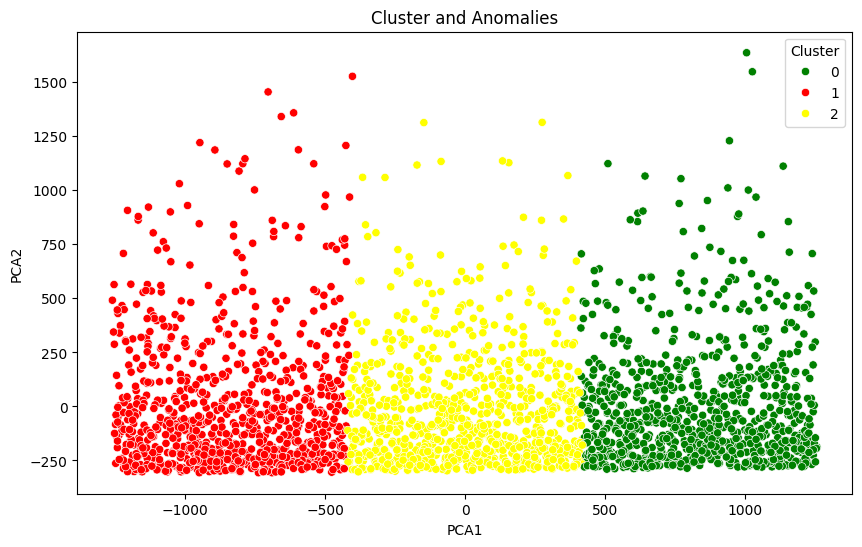

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster',data=data, palette=['green','red','yellow'])
plt.title('Cluster and Anomalies')
plt.legend(title='Cluster')
plt.show()
plt.show()